# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [3]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [4]:
# Your code here
def alpha_func(D, idx):
    sepal_length = D.loc[idx, 'Sepal.Length']
    sepal_width = D.loc[idx, 'Sepal.Width']
    
    alpha = sepal_length / sepal_width
    
    return alpha



Test the code below

In [5]:
alpha_func(df, range(100))

0     1.457143
1     1.633333
2     1.468750
3     1.483871
4     1.388889
        ...   
95    1.900000
96    1.965517
97    2.137931
98    2.040000
99    2.035714
Length: 100, dtype: float64

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [6]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

85    1.764706
63    2.103448
51    2.000000
26    1.470588
30    1.548387
        ...   
62    2.727273
4     1.388889
8     1.517241
37    1.361111
83    2.222222
Length: 100, dtype: float64

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [10]:
# Add your code here to set the seed
#(iii) because does not provide variance, uncertainity. how much variance would we see with another sample. 
#(iv)

def boot_SE(data, num_bootstrap_samples=1000):
    np.random.seed(42)  
    boot_means = []
    n = len(data)
    
    for _ in range(num_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        boot_mean = np.mean(bootstrap_sample)
        boot_means.append(boot_mean)
    
    boot_se = np.std(boot_means)
    return boot_se

sepal_lengths = df['Sepal.Length'].values


bootstrap_standard_error = boot_SE(sepal_lengths)

print(f"Bootstrap Standard Error of Sepal Length: {bootstrap_standard_error:.4f}")


Bootstrap Standard Error of Sepal Length: 0.0670


_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [11]:
# Your code here
def alpha_func(D, idx):
    
    sepal_length = D.loc[idx, 'Sepal.Length']
    sepal_width = D.loc[idx, 'Sepal.Width']
    
    alpha = sepal_length / sepal_width
    
    return alpha


_(vi)_ What is the original mean value of `Sepal.Length`?

Next, let's look _inside_ our bootstrapping to understand the new, bootstrapped sample we have created. Let's review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value.

In [20]:
# Add your code here



bootstrapped_mean = np.mean(boot_se_samples)
bootstrapped_std = np.std(boot_se_samples)
print(f"Bootstrapped Mean Sepal Length: {bootstrapped_mean:.4f}")
print(f"Bootstrapped Standard Deviation: {bootstrapped_std:.4f}")


print(f"Difference between Bootstrapped Mean and Original Mean: {bootstrapped_mean - original_mean_sepal_length:.4f}")


Bootstrapped Mean Sepal Length: 5.8409
Bootstrapped Standard Deviation: 0.0683
Difference between Bootstrapped Mean and Original Mean: -0.0025


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris petal length. (Hint: use the `np.percentile` function)

In [17]:
# Add your code here

confidence_interval = np.percentile(boot_se_samples, [2.5, 97.5])
print(f"95% Confidence Interval for Sepal Length Mean: {confidence_interval}")

95% Confidence Interval for Sepal Length Mean: [5.712  5.9647]


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

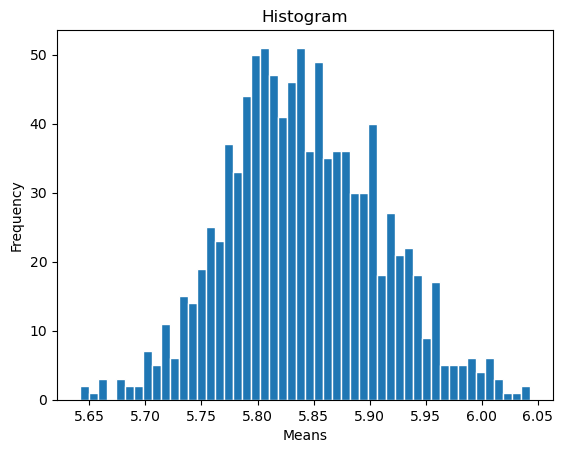

In [26]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
#Add your code here
ax.hist(boot_se_samples, bins=50, edgecolor='white')

# Add a title
#Add your code here
ax.set_title('Histogram')

# Add a label to the x-axis
#Add your code here
ax.set_xlabel('Means')

# Add a label to the y-axis
#Add your code here
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

In [ ]:
# Write your answer here

#allocate space based on mean. put some buffer. our analysis has very high confidence in accomodating nearly all variations. 
# Original Mean Sepal Length:
#The original mean is 5.8433
#Bootstrap Standard Error is 0.0683
#Bootstrapped Mean Sepal Length is 5.8409. very close to the original mean
#95% Confidence Interval [5.712  5.9647] a range within which we are 95% confident that the true population mean Sepal.Length lies



# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
